   Size1  Abundance1  Size2  Abundance2  Size3  Abundance3  Size4  Abundance4  \
0   11.0   57.044493   75.0        41.0   10.0   19.625850  100.0       10.48   
1   18.0   21.884237  125.0        23.5   20.0   15.782313  200.0        8.10   
2   37.5   14.630525  175.0         9.5   30.0   15.408163  300.0        7.50   
3   62.5    3.656641  225.0         7.0   40.0   12.176871  400.0        8.98   
4   87.5    1.868927  275.0         3.5   50.0    8.503401  500.0        8.10   

   Size5  Abundance5  ...  Size14  Abundance14  Size15  Abundance15  Size16  \
0   75.0   30.667957  ...   450.0     9.151960   500.0    70.387021   125.0   
1  125.0   28.673766  ...   550.0     6.845601  1000.0    15.004121   175.0   
2  175.0   14.424008  ...   650.0     4.599564  1500.0     0.730572   225.0   
3  225.0    7.531462  ...   750.0     9.145864  2000.0     1.262221   275.0   
4  275.0    5.072604  ...   850.0     4.595713  2500.0     2.433463   325.0   

   Abundance16  Size17  Abundance17  S

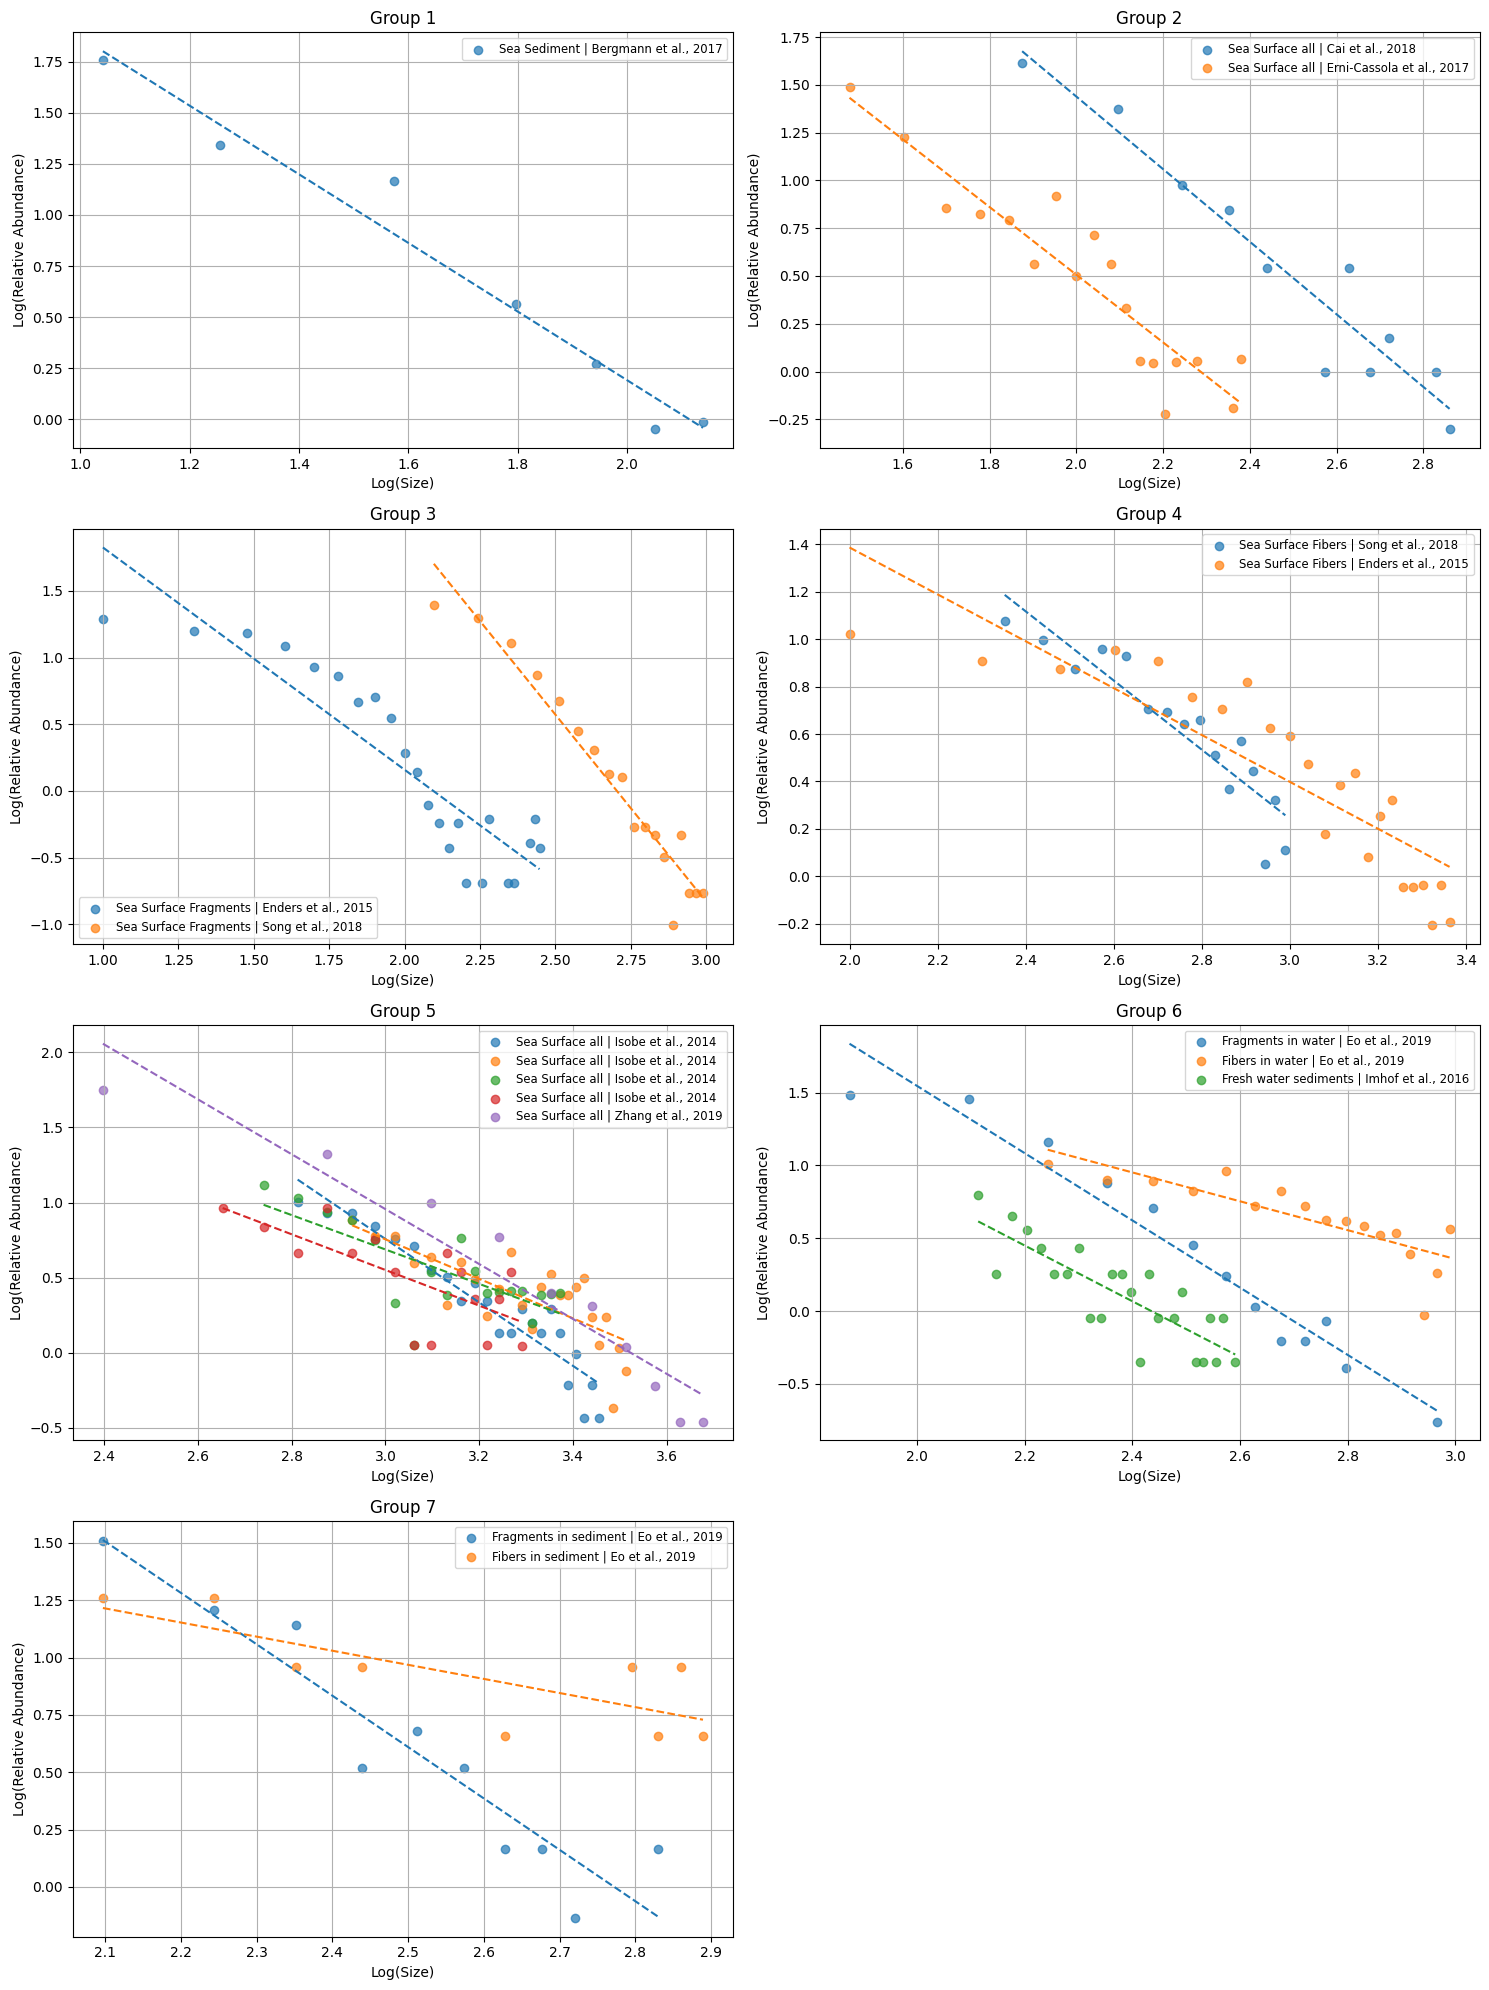

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math

# -------------------------------
# 1. Load and Process the Data
# -------------------------------
file_path = "your_dataset.xlsx"  
data = pd.read_excel(file_path)

# Preview the data
print(data.head())

# Dictionary to store processed data
processed_data = {}

# Identify size and abundance column pairs
columns = data.columns
num_datasets = len(columns) // 2  # Each dataset has a Size and Abundance column

for i in range(1, num_datasets + 1):
    size_col = f"Size{i}"
    abundance_col = f"Abundance{i}"
    
    # Filter and log-transform the data
    df_filtered = data[[size_col, abundance_col]].dropna()  # Remove rows with NaN
    df_filtered = df_filtered[df_filtered[abundance_col] > 0]  # Exclude rows with 0 abundance
    df_filtered['log_size'] = np.log10(df_filtered[size_col])
    df_filtered['log_abundance'] = np.log10(df_filtered[abundance_col])
    
    # Store the processed dataframe
    processed_data[f"Dataset{i}"] = df_filtered

# -------------------------------
# 2. Define Dataset Names and Groups
# -------------------------------
dataset_names = {
    "Dataset1": "Sea Sediment | Bergmann et al., 2017",
    "Dataset2": "Sea Surface all | Cai et al., 2018",
    "Dataset3": "Sea Surface Fragments | Enders et al., 2015",
    "Dataset4": "Sea Surface Fibers | Enders et al., 2015",
    "Dataset5": "Fragments in water | Eo et al., 2019",
    "Dataset6": "Fibers in water | Eo et al., 2019",
    "Dataset7": "Fragments in sediment | Eo et al., 2019",
    "Dataset8": "Fibers in sediment | Eo et al., 2019",
    "Dataset9": "Sea Surface all | Erni-Cassola et al., 2017",
    "Dataset10": "Fresh water sediments | Imhof et al., 2016",
    "Dataset11": "Sea Surface all | Isobe et al., 2014",
    "Dataset12": "Sea Surface all | Isobe et al., 2014",
    "Dataset13": "Sea Surface all | Isobe et al., 2014",
    "Dataset14": "Sea Surface all | Isobe et al., 2014",
    "Dataset15": "FP all | Scheurer & Bigalke, 2018",
    "Dataset16": "Sea Surface Fragments | Song et al., 2018",
    "Dataset17": "Sea Surface Fibers | Song et al., 2018",
    "Dataset18": "Sea Surface all | Zhang et al., 2019"
}

# Define the groups as specified
groups = {
    "Group 1": ["Dataset1"],
    "Group 2": ["Dataset2", "Dataset9"],
    "Group 3": ["Dataset3", "Dataset16"],
    "Group 4": ["Dataset17", "Dataset4"],
    "Group 5": ["Dataset11", "Dataset12", "Dataset13", "Dataset14", "Dataset18"],
    "Group 6": ["Dataset5", "Dataset6", "Dataset10"],
    "Group 7": ["Dataset7", "Dataset8"]
}

# -------------------------------
# 3. Plotting: One Subplot per Group
# -------------------------------
n_groups = len(groups)
# Calculate grid size: 2 columns, enough rows to accommodate all groups.
rows = math.ceil(n_groups / 2)
fig, axs = plt.subplots(rows, 2, figsize=(15, rows * 5))
axs = axs.flatten()  # Flatten for easy iteration

# Loop over each group and plot its datasets
for i, (group_name, dataset_keys) in enumerate(groups.items()):
    ax = axs[i]
    for dataset in dataset_keys:
        # Ensure the dataset exists in processed_data
        if dataset in processed_data:
            df = processed_data[dataset]
            descriptive_name = dataset_names.get(dataset, dataset)
            
            # Scatter plot for the dataset
            ax.scatter(df['log_size'], df['log_abundance'], 
                       label=descriptive_name, alpha=0.7)
            
            # Fit and plot a linear trendline
            coefficients = np.polyfit(df['log_size'], df['log_abundance'], 1)
            trendline = np.poly1d(coefficients)
            x_values = np.linspace(df['log_size'].min(), df['log_size'].max(), 100)
            ax.plot(x_values, trendline(x_values), linestyle='--', label="_nolegend_")
    
    # Customize the subplot
    ax.set_xlabel("Log(Size)")
    ax.set_ylabel("Log(Relative Abundance)")
    ax.set_title(group_name)
    ax.grid(True)
    ax.legend(fontsize='small')

# Hide any unused subplots (if any)
for j in range(i + 1, len(axs)):
    fig.delaxes(axs[j])

plt.tight_layout()
plt.show()
